# imports

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator
from scipy.stats.stats import pearsonr

# creating entries for heatmap

In [2]:
def heat_map_entry(table):
    """Create arrays to enter into the plot_heat_map function
    Args:
        table     (DataFrame): The data to use
    Returns:
        carray_pew    (array): array of c values against pew
        parray_pew    (array): array of p values against pew
        carray_vel    (array): array of c values against vel
        parray_vel    (array): array of p values against vel
    """
 
    # keeps only features 1-7
    table = table.iloc[:7,:]
    # creates indexed table
    itable = table.set_index('features')
    # keeps properties we want to plot
    itable = itable.iloc[:,8:]

    # creates dfs of just c and p values and just pew and vel
    ctable = itable[itable.columns[::2]]
    ptable = itable[itable.columns[1::2]]
    ctable_pew = ctable[ctable.columns[::2]]
    ctable_vel = ctable[ctable.columns[1::2]]
    ptable_pew = ptable[ptable.columns[::2]]
    ptable_vel = ptable[ptable.columns[1::2]]
    
    #makes dfs into arrays
    carray_pew = ctable_pew.to_numpy()
    carray_vel = ctable_vel.to_numpy()
    parray_pew = ptable_pew.to_numpy()
    parray_vel = ptable_vel.to_numpy()

    return carray_pew, parray_pew, carray_vel, parray_vel

In [15]:
features = [f'pW{i}' for i in range(1, 8)]
properties = ['logMassFSPS','logMassPEGASE', 'logSSFRFSPS', 'logSSFRPEGASE',
              'ageFSPS', 'agePEGASE','kpc',]

# heatmap plotting functions

In [16]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    #ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [17]:
def plot_heat_map(carray, parray, against):
    """plots 2 heat maps for c and p value respectively
       host gal properties on vertical axis and features on horizontal
    Args:
        carray     (array): array of c values
        parray     (array): array of p values
        against    (string): pew or vel
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    # 1st plot


    im, _ = heatmap(carray, features, properties, ax=ax1,
                cmap="coolwarm", cbarlabel=f"c values for property vs. {against}")
    annotate_heatmap(im, valfmt="{x:.3f}", size=10, color=('black'))

    # 2nd plot

    im, _ = heatmap(parray, features, properties, ax=ax2, vmin=0,
                cmap="Blues", cbarlabel=f"p values for property vs. {against}")
    annotate_heatmap(im, valfmt="{x:.3f}", size=10, threshold=0.6,
                 textcolors=("black","white"))

    plt.tight_layout()
    plt.show()

# heat maps for all SNe

In [18]:
#table = pd.read_csv("/Users/emilysf098/Desktop/Research/SN-Spectral-Evolution/results/pearson_table.csv")
table = pd.read_csv("/Users/ellakane/Desktop/research/SN-Spectral-Evolution/results/pearson_table.csv")
carray_pew, parray_pew, carray_vel, parray_vel = heat_map_entry(table)

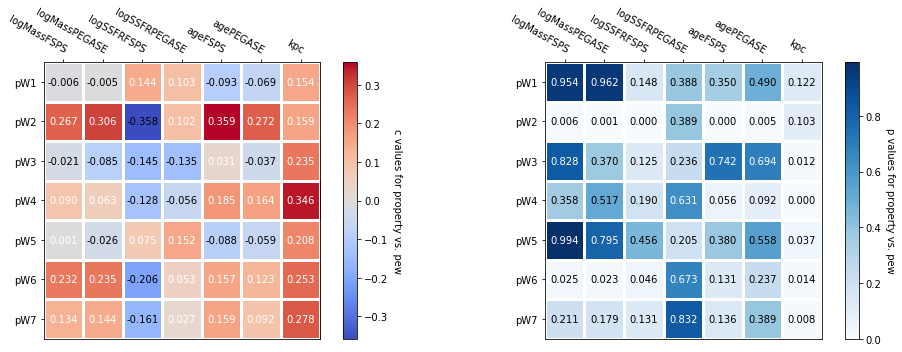

In [19]:
plot_heat_map(carray_pew, parray_pew, 'pew')

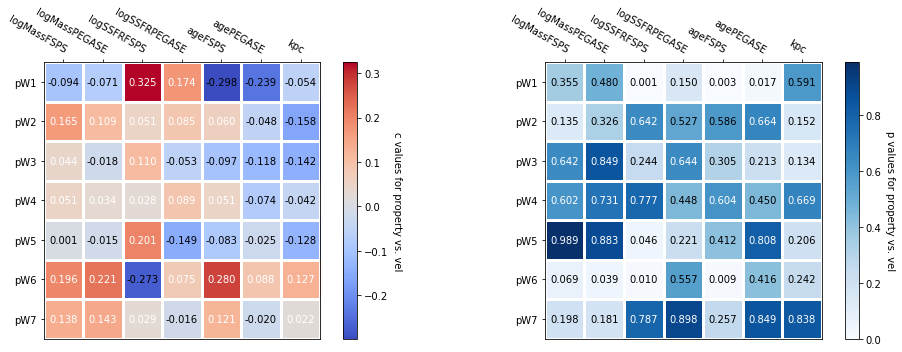

In [20]:
plot_heat_map(carray_vel, parray_vel, 'vel')

# for broad line

In [9]:
bl_table = pd.read_csv("/Users/emilysf098/Desktop/Research/SN-Spectral-Evolution/results/bl_pearson_table.csv")
bl_carray_pew, bl_parray_pew, bl_carray_vel, bl_parray_vel = heat_map_entry(bl_table)

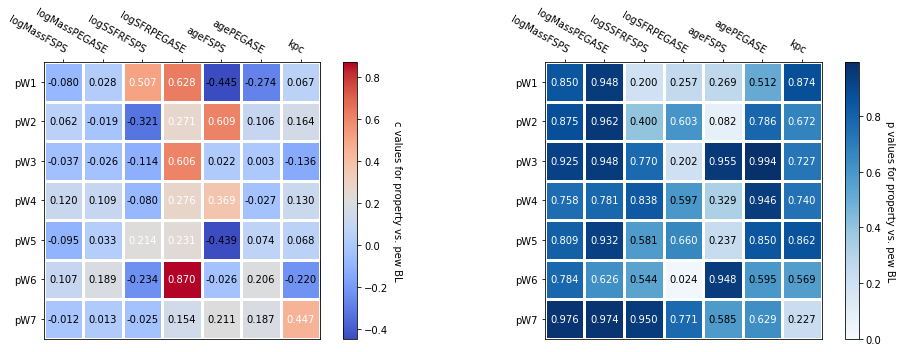

In [10]:
plot_heat_map(bl_carray_pew, bl_parray_pew, 'pew BL')

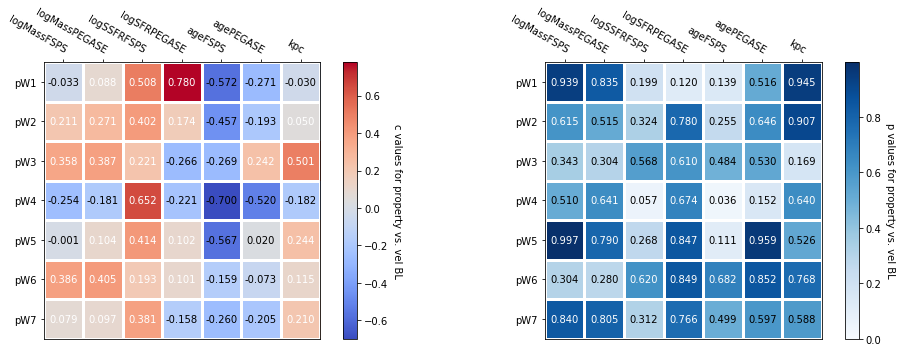

In [11]:
plot_heat_map(bl_carray_vel, bl_parray_vel, 'vel BL')

# for shallow silicon

In [12]:
ss_table = pd.read_csv("/Users/emilysf098/Desktop/Research/SN-Spectral-Evolution/results/ss_pearson_table.csv")
ss_carray_pew, ss_parray_pew, ss_carray_vel, ss_parray_vel = heat_map_entry(ss_table)

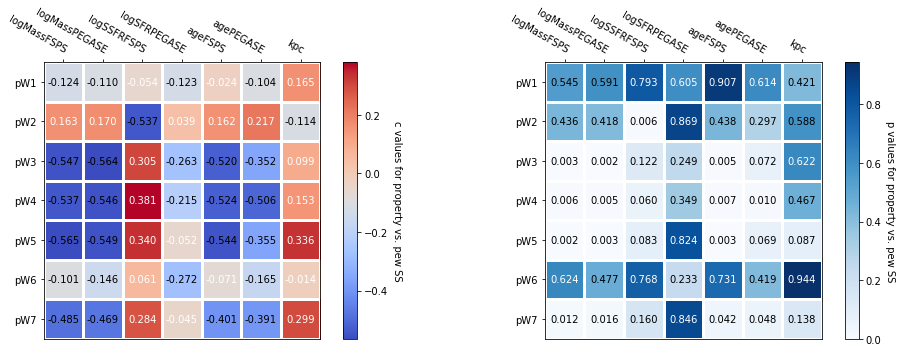

In [13]:
plot_heat_map(ss_carray_pew, ss_parray_pew, 'pew SS')

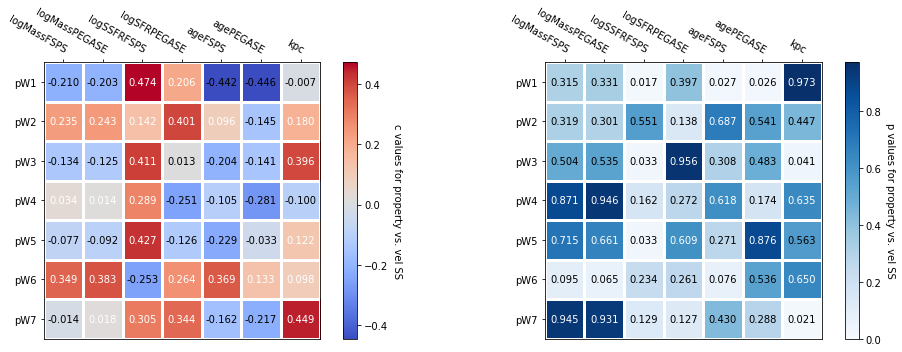

In [14]:
plot_heat_map(ss_carray_vel, ss_parray_vel, 'vel SS')

# for cool

In [15]:
cl_table = pd.read_csv("/Users/emilysf098/Desktop/Research/SN-Spectral-Evolution/results/cl_pearson_table.csv")
cl_carray_pew, cl_parray_pew, cl_carray_vel, cl_parray_vel = heat_map_entry(cl_table)

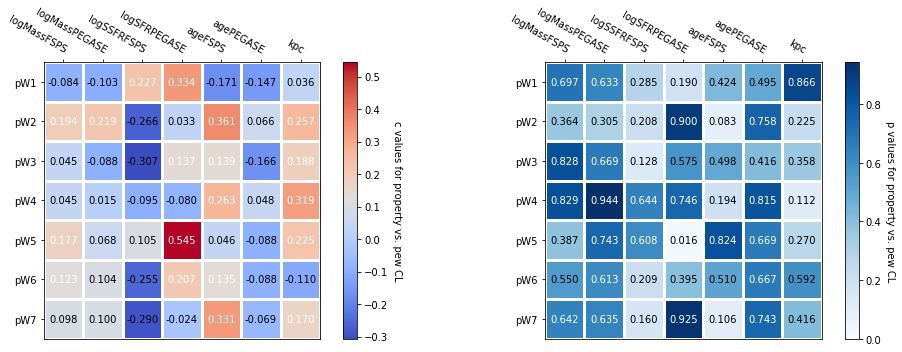

In [16]:
plot_heat_map(cl_carray_pew, cl_parray_pew, 'pew CL')

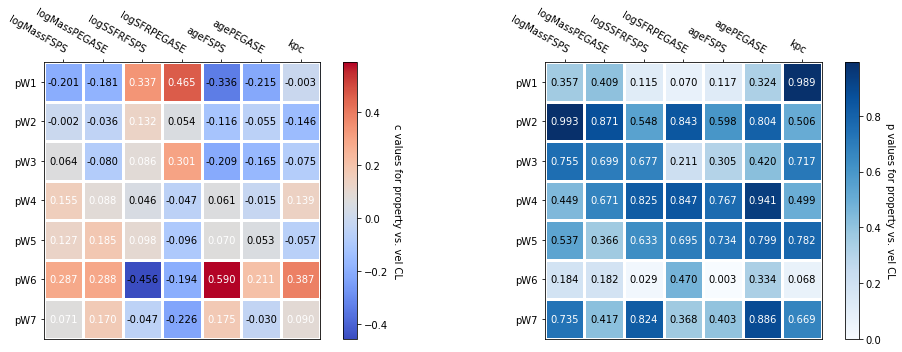

In [17]:
plot_heat_map(cl_carray_vel, cl_parray_vel, 'vel CL')

# for core normal

In [18]:
cn_table = pd.read_csv("/Users/emilysf098/Desktop/Research/SN-Spectral-Evolution/results/cn_pearson_table.csv")
cn_carray_pew, cn_parray_pew, cn_carray_vel, cn_parray_vel = heat_map_entry(cn_table)

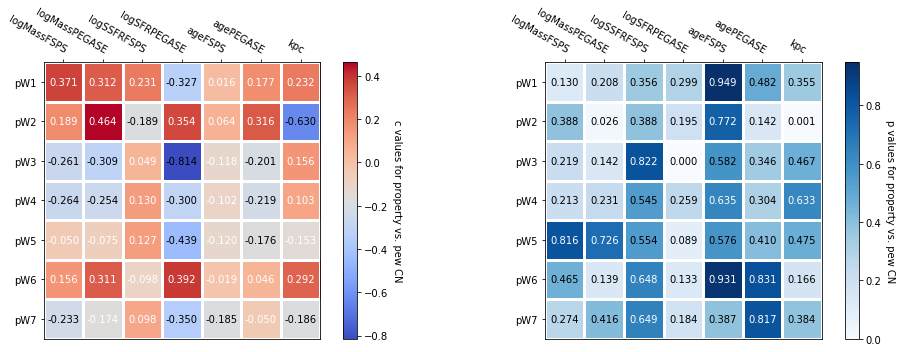

In [19]:
plot_heat_map(cn_carray_pew, cn_parray_pew, 'pew CN')

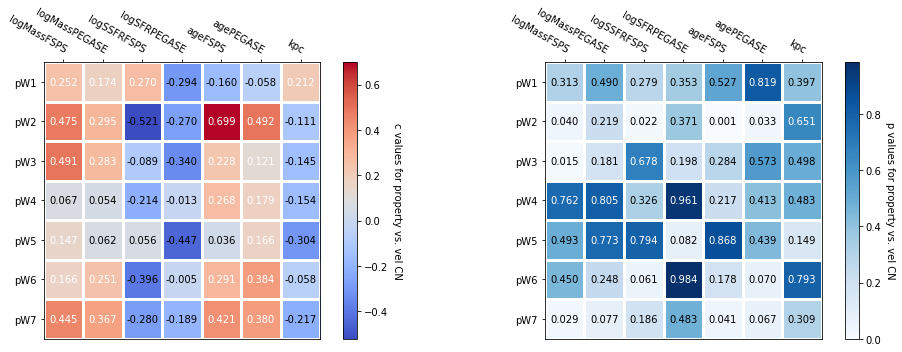

In [20]:
plot_heat_map(cn_carray_vel, cn_parray_vel, 'vel CN')

In [57]:
def significant_list(table):
    """Create arrays to enter into the plot_heat_map function
    Args:
        table     (DataFrame): The data to use
    Returns:
        
    """
 
    # keeps only features 1-7
    table = table.iloc[:7,:]
    # creates indexed table
    #itable = table.set_index('features')
    #im not sure if we need to set index or not!!
    itable = table
    # keeps properties we want to plot
    itable = itable.iloc[:,8:]
    # creates dfs of just c and p values and just pew and vel
    ctable = itable[itable.columns[::2]]
    cprops = ctable.columns.values.tolist()
    ptable = itable[itable.columns[1::2]]
    pprops = ptable.columns.values.tolist()
    #breakpoint()
    for i, j in zip(cprops, pprops):
        ccolumn = ctable[i]
        pcolumn = ptable[j]
        #for ccolumn in ctable:
        for c, p in zip(ccolumn, pcolumn):
            #if (np.abs(c) >= 0.4 and p <= 0.05):
            if np.abs(p) <= 0.05:
                print(ccolumn, c, p)
            else:
                continue

In [59]:
from pandas import DataFrame
sig_list = significant_list(table)
list_df = DataFrame(sig_list,columns=['test'])
list_df
#trying to get the list into some nice form but struggling

0    0.719460
1    0.760060
2    0.407974
3    0.886507
4    0.544560
5    0.370397
6    0.125737
Name: zspecHelio_p_vel, dtype: float64 0.7194598074087752 -0.005833428752036563
0    0.719460
1    0.760060
2    0.407974
3    0.886507
4    0.544560
5    0.370397
6    0.125737
Name: zspecHelio_p_vel, dtype: float64 0.4079740335990791 -0.0207163137290038
0    0.719460
1    0.760060
2    0.407974
3    0.886507
4    0.544560
5    0.370397
6    0.125737
Name: zspecHelio_p_vel, dtype: float64 0.5445604496430765 0.0007984443968001853
0    0.953598
1    0.005740
2    0.827591
3    0.358092
4    0.993677
5    0.024610
6    0.211340
Name: logMassFSPS_p_pew, dtype: float64 0.8275909600928248 0.04419442365003605
0    0.953598
1    0.005740
2    0.827591
3    0.358092
4    0.993677
5    0.024610
6    0.211340
Name: logMassFSPS_p_pew, dtype: float64 0.9936773203845286 0.0014149859719966506
0    0.354733
1    0.134621
2    0.642077
3    0.602028
4    0.988910
5    0.068904
6    0.198163
Name: logMassF

,test
